In [1]:
import numpy as np
import os
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
import math
from scipy.ndimage.filters import convolve
from PIL import Image, ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import seaborn as sns
from sklearn.metrics import roc_curve, auc

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\1780959301.py:15: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [2]:
counter = 0
for file in[file for file in os.listdir(r"D:\PRpro\SOCOFing\Real")][:6000]:
    if counter % 10 ==0:
        print(counter)
        print(file)
    counter += 1  

0
100__M_Left_index_finger.BMP
10
101__M_Left_index_finger.BMP
20
102__M_Left_index_finger.BMP
30
103__F_Left_index_finger.BMP
40
104__M_Left_index_finger.BMP
50
105__M_Left_index_finger.BMP
60
106__M_Left_index_finger.BMP
70
107__M_Left_index_finger.BMP
80
108__M_Left_index_finger.BMP
90
109__F_Left_index_finger.BMP
100
10__M_Left_index_finger.BMP
110
110__F_Left_index_finger.BMP
120
111__M_Left_index_finger.BMP
130
112__M_Left_index_finger.BMP
140
113__M_Left_index_finger.BMP
150
114__F_Left_index_finger.BMP
160
115__F_Left_index_finger.BMP
170
116__M_Left_index_finger.BMP
180
117__F_Left_index_finger.BMP
190
118__F_Left_index_finger.BMP
200
119__F_Left_index_finger.BMP
210
11__M_Left_index_finger.BMP
220
120__M_Left_index_finger.BMP
230
121__F_Left_index_finger.BMP
240
122__M_Left_index_finger.BMP
250
123__M_Left_index_finger.BMP
260
124__M_Left_index_finger.BMP
270
125__M_Left_index_finger.BMP
280
126__F_Left_index_finger.BMP
290
127__F_Left_index_finger.BMP
300
128__M_Left_index_f

In [3]:
DATA_DIR = r"D:\PRpro\SOCOFing\Real"
list_dirs = list(glob.glob(DATA_DIR+"*.BMP"))
num_images = len(list_dirs)

In [4]:
# Check if the directory exists
if not os.path.exists(DATA_DIR):
    print("Directory does not exist:", DATA_DIR)
    # You may need to correct the directory path here
    # or ensure the directory exists with the correct permissions
    exit()

# List BMP files in the directory
list_dirs = glob.glob(os.path.join(DATA_DIR, "*.BMP"))

# Check if any files are found
if not list_dirs:
    print("No BMP files found in directory:", DATA_DIR)
    # Ensure there are BMP files in the directory specified by DATA_DIR
    exit()

# Select random images
num_images = len(list_dirs)
random.seed(42)
r = random.randint(0, num_images - 3)  # Ensure there are enough images to select from
display_list = list_dirs[r:r+3]

# Check if enough images are selected
if len(display_list) < 3:
    print("Not enough images to display.")
    # You may want to handle this case differently based on your requirements
    exit()

In [5]:
# Load and display imagesz
image1 = imageio.imread(display_list[0])
image2 = imageio.imread(display_list[1])
image3 = imageio.imread(display_list[2])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\1979228329.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread(display_list[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\1979228329.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread(display_list[1])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\1979228329.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` o

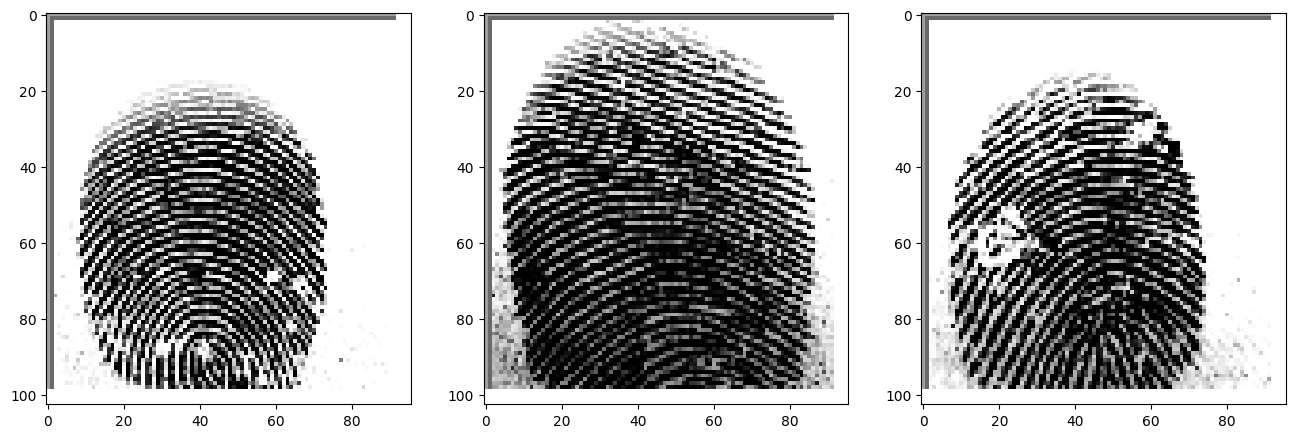

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()

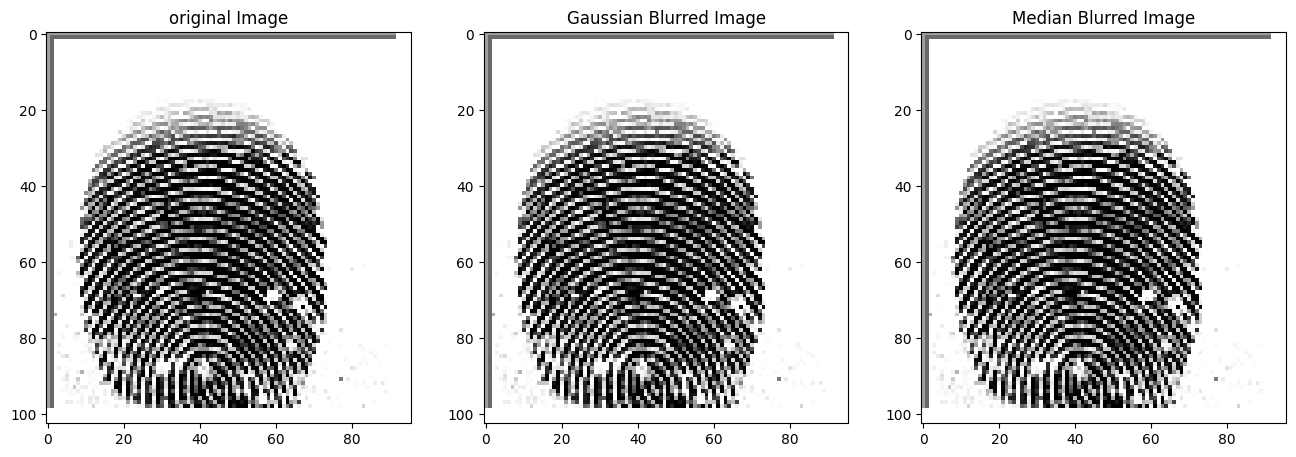

In [7]:
gauss_blur = cv2.GaussianBlur(image1,(1,1),0)
median_blur = cv2.medianBlur(image1,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(image1);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);

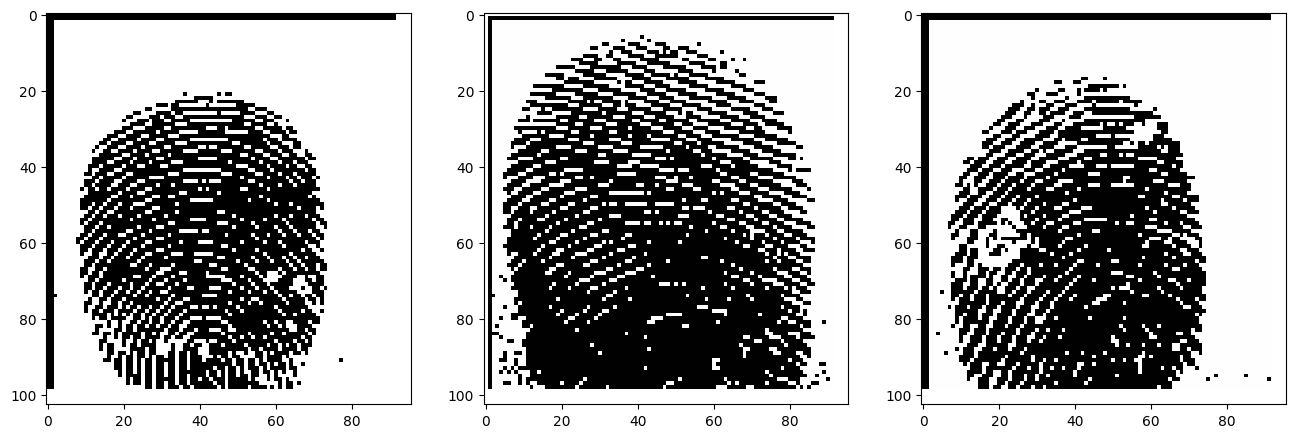

In [9]:
THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()

image1 = np.array(image1 > THRESHOLD1).astype(int) * 255
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

In [10]:
img_name = display_list[0]
gray_img_array = np.array(Image.open(img_name).convert('P'))

In [12]:
# edge detect
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [13]:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )

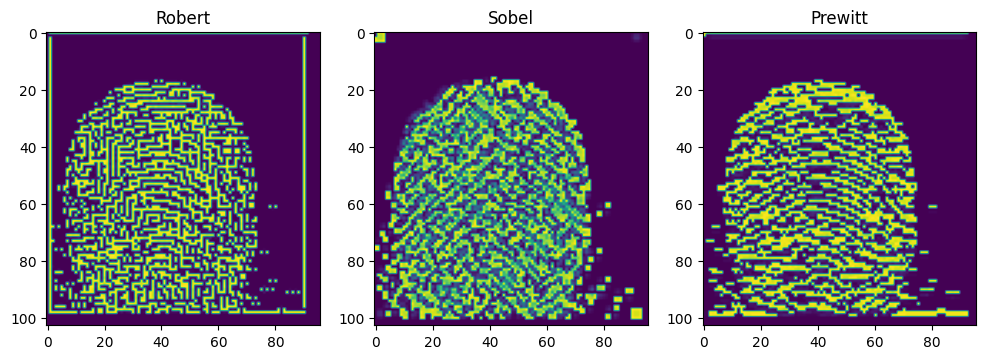

In [14]:
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\2710860095.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(gray, sigma=sigma, order='rc')


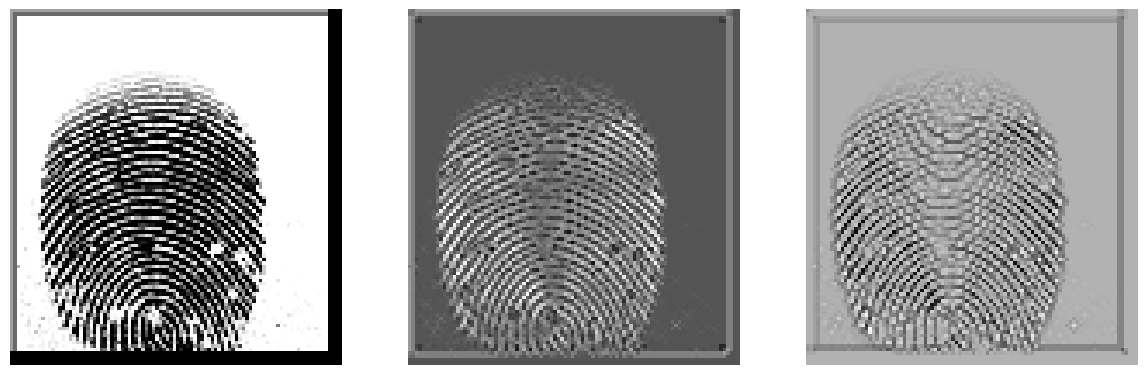

In [15]:
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

In [16]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [17]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

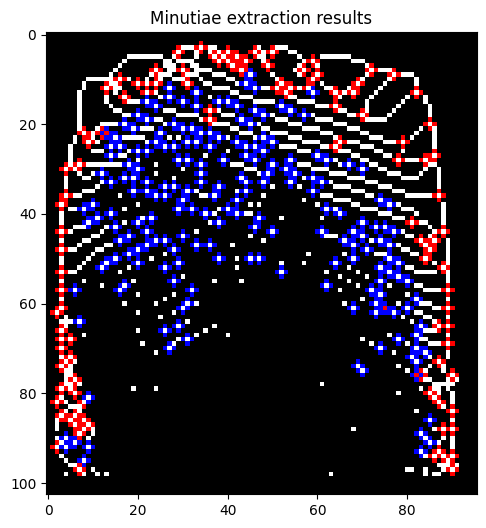

In [18]:
img_name = display_list[1]
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)

In [19]:
counter = 0
for file in[file for file in os.listdir(r"D:\PRpro\SOCOFing\Real")][:6000]:
    if counter % 10 ==0:
        print(counter)
        print(file)
    counter += 1  

0
100__M_Left_index_finger.BMP
10
101__M_Left_index_finger.BMP
20
102__M_Left_index_finger.BMP
30
103__F_Left_index_finger.BMP
40
104__M_Left_index_finger.BMP
50
105__M_Left_index_finger.BMP
60
106__M_Left_index_finger.BMP
70
107__M_Left_index_finger.BMP
80
108__M_Left_index_finger.BMP
90
109__F_Left_index_finger.BMP
100
10__M_Left_index_finger.BMP
110
110__F_Left_index_finger.BMP
120
111__M_Left_index_finger.BMP
130
112__M_Left_index_finger.BMP
140
113__M_Left_index_finger.BMP
150
114__F_Left_index_finger.BMP
160
115__F_Left_index_finger.BMP
170
116__M_Left_index_finger.BMP
180
117__F_Left_index_finger.BMP
190
118__F_Left_index_finger.BMP
200
119__F_Left_index_finger.BMP
210
11__M_Left_index_finger.BMP
220
120__M_Left_index_finger.BMP
230
121__F_Left_index_finger.BMP
240
122__M_Left_index_finger.BMP
250
123__M_Left_index_finger.BMP
260
124__M_Left_index_finger.BMP
270
125__M_Left_index_finger.BMP
280
126__F_Left_index_finger.BMP
290
127__F_Left_index_finger.BMP
300
128__M_Left_index_f

In [21]:
def extract_label(img_path, train=True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')
    
    if train:
        gender, lr, finger, _, _ = etc.split('_')
    else:
        gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr =0 if lr == 'Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
     
    return np.array([finger], dtype=np.uint16)

In [25]:
IMG_SIZE = 96

def load_data(path, train):
    print("loading data from: ", path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            label = extract_label(os.path.join(path, img),train)
            data.append([label[0], img_resize ])
        except Exception as e:
            pass
    return data

In [26]:
Real_path = r"D:\PRpro\SOCOFing\Real"
Easy_path = r"D:\PRpro\SOCOFing\Altered\Altered-Easy"
Medium_path = r"D:\PRpro\SOCOFing\Altered\Altered-Medium"
Hard_path = r"D:\PRpro\SOCOFing\Altered\Altered-Hard"

In [26]:
easy_data = load_data(Easy_path, train=True)
medium_data = load_data(Medium_path, train=True)
hard_data = load_data(Hard_path, train=True)
test = load_data(Real_path, train=False)


loading data from:  D:\PRpro\SOCOFing\Altered\Altered-Easy
loading data from:  D:\PRpro\SOCOFing\Altered\Altered-Medium
loading data from:  D:\PRpro\SOCOFing\Altered\Altered-Hard
loading data from:  D:\PRpro\SOCOFing\Real


In [27]:
import random

# Shuffle each dataset individually
random.shuffle(easy_data)
random.shuffle(medium_data)
random.shuffle(hard_data)

# Combine all datasets 
data = easy_data + medium_data + hard_data

# Shuffle the combined dataset
random.shuffle(data)


In [28]:
data[0]

[3,
 array([[160, 158, 158, ...,   0,   0,   0],
        [160, 105, 121, ...,   0,   0,   0],
        [160, 105, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]

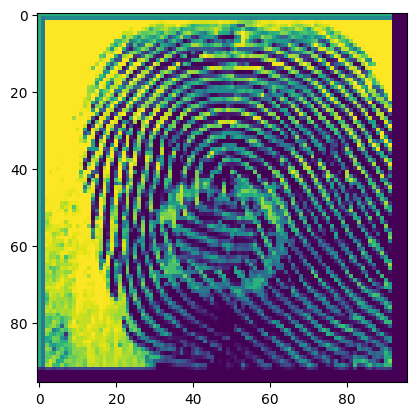

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(easy_data[0][1])

In [30]:
X, y = [],[]

for label, feature in data:
    y.append(label)
    X.append(feature)

 
X_train = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_train = X_train/255

y_train = np.array(y)

In [31]:
X_train.shape, y_train.shape

((49270, 96, 96, 1), (49270,))

In [32]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=uint16)

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [34]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform',
           input_shape = [IMG_SIZE, IMG_SIZE, 1]),
    MaxPooling2D(2),
    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, kernel_initializer='he_uniform', activation='relu'),
    Dense(5,activation='softmax'),
    
])

model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369,637 (9.04 MB)

 Trainable params: 2,369,637 (9.04 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.3776 - loss: 3.1636 - val_accuracy: 0.6191 - val_loss: 0.9464
Epoch 2/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 64s 208ms/step - accuracy: 0.6585 - loss: 0.8627 - val_accuracy: 0.7285 - val_loss: 0.7044
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.7739 - loss: 0.6137 - val_accuracy: 0.7924 - val_loss: 0.5557
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 64s 207ms/step - accuracy: 0.8615 - loss: 0.4055 - val_accuracy: 0.8490 - val_loss: 0.4145
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 67s 219ms/step - accuracy: 0.9126 - loss: 0.2731 - val_accuracy: 0.8879 - val_loss: 0.3107
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 68s 220ms/step - accuracy: 0.9476 - loss: 0.1755 - val_accuracy: 0.9299 - val_loss: 0.2109
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 68s 219ms/step - accuracy: 0.9685 - loss: 0.1138 - val_accuracy: 0.9341 - val_loss: 0.1926
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 68s 220ms/step - accuracy: 0.9809 - loss: 0

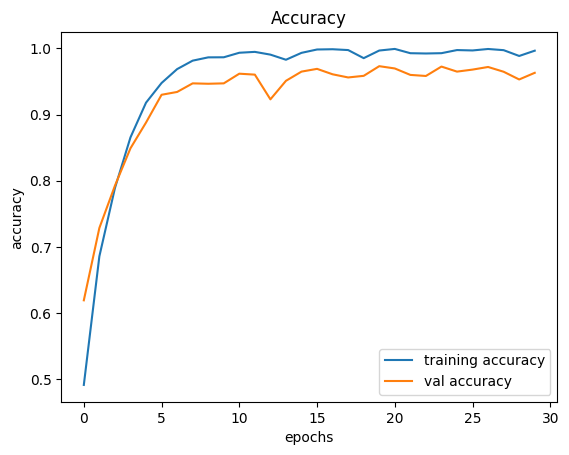

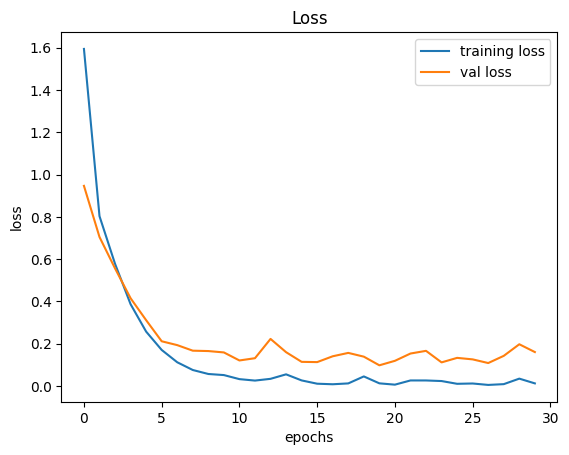

In [36]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
X_test,y_test = [],[]

for label, feature in test:
    y_test.append(label)
    X_test.append(feature)
    
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test = X_test/255

y_test = np.array(y_test)

In [38]:
model.evaluate(X_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9931 - loss: 0.0243


[0.02524476684629917, 0.9933333396911621]

In [39]:
predictions = model.predict(X_test)
predictions[:5]

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


array([[1.02268056e-14, 1.00000000e+00, 7.89892984e-10, 3.93465200e-17,
        5.90907283e-16],
       [5.83859560e-26, 2.76352797e-19, 3.67736901e-13, 1.11364299e-28,
        1.00000000e+00],
       [1.33956677e-24, 6.58697923e-13, 1.00000000e+00, 3.08999211e-18,
        2.94598484e-10],
       [1.60014715e-17, 8.36926617e-09, 1.22276465e-08, 1.00000000e+00,
        1.83052273e-14],
       [1.00000000e+00, 1.29358138e-25, 1.15229727e-16, 5.50140748e-26,
        3.54791772e-31]], dtype=float32)

In [40]:
predicted = [np.argmax(i) for i in predictions]
predicted[:5]

[1, 4, 2, 3, 0]

In [41]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(50.722222222222214, 0.5, 'Truth')

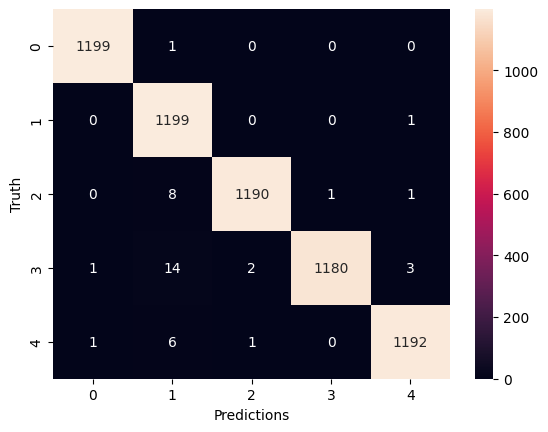

In [42]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [43]:
# new  ROCCCCCCCCCCCCCCCCCCCCCCCC Curve -------------------------------------------------

In [44]:
X_test, y_test = [], []
for label, feature in test:
    y_test.append(label)
    X_test.append(feature)

In [45]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test / 255

In [46]:
y_test = np.array(y_test)

In [47]:
# Evaluate the loaded model on the test data
predictions = loaded_model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


In [48]:
# Calculate ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5  # Number of classes
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

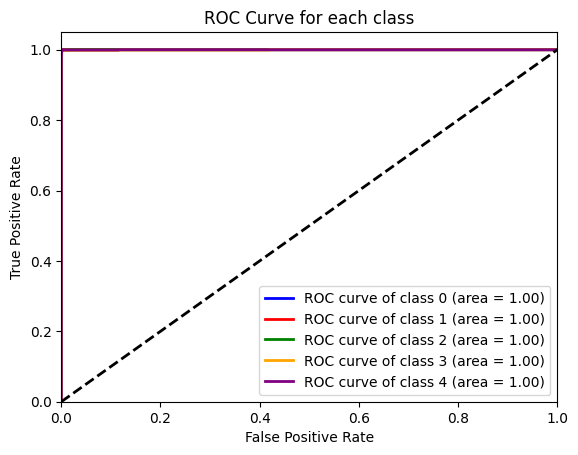

In [49]:
# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [53]:
from tensorflow.keras.models import save_model
save_model(model, 'fingerprint.h5')


In [54]:
from tensorflow.keras.models import save_model
save_model(model, 'fingerprint.keras')


In [55]:
from tensorflow.keras.models import load_model
loaded_model = load_model('fingerprint.keras')


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
